In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear.csv')

In [5]:
features = ['Modelo', 'Marca', 'Cor', 'Tamanho', 'Estampa', 'Preço Unitário (R$)'] 
target = 'Quantidade'

In [4]:
df = pd.get_dummies(df, columns=['Modelo', 'Marca', 'Cor', 'Tamanho', 'Estampa'])

In [5]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['Modelo', 'Marca', 'Cor', 'Tamanho', 'Estampa'] not in index"

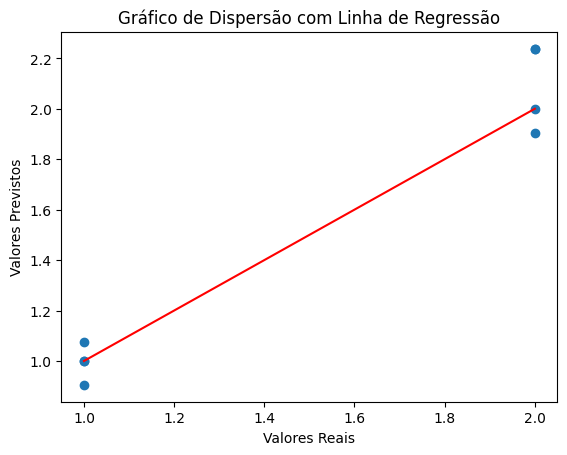

RMSE: 0.1304474632822092


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregar os dados
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear.csv')

# Separar as variáveis independentes (X) e a variável dependente (y)
X = data[['Modelo', 'Marca', 'Cor', 'Tamanho', 'Estampa', 'Preço Unitário (R$)']]
y = data['Quantidade']

# Converter variáveis categóricas
data = pd.get_dummies(data, columns=['Modelo', 'Marca', 'Cor', 'Tamanho', 'Estampa'])

# Obter todas as colunas do DataFrame
all_columns = data.columns

# Filtrar as colunas para usar como features (exemplo com expressão regular)
import re
features = [col for col in all_columns if re.match(r'^(Modelo|Marca|Cor|Tamanho|Estampa)_.+', col)]
features.append('Preço Unitário (R$)')  # Adicionar a coluna de preço

# Dividir os dados em conjuntos de treinamento e teste
X = data[features]
y = data['Quantidade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

# ... código para treinar o modelo e fazer previsões ...

plt.scatter(y_test, y_pred) # Gráfico de dispersão
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Linha de referência
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Dispersão com Linha de Regressão")
plt.show()

# Avaliar o modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)


In [ ]:
model = LinearRegression()

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Carregar o dataset
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear.csv')

# 2. Preparar os dados: Agrupar por data e somar o valor total das vendas
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum().reset_index()

# 3. Converter a coluna de data para um número inteiro (representando dias a partir da primeira data)
daily_sales['Dias'] = (daily_sales['Data da Venda'] - daily_sales['Data da Venda'].min()).dt.days

# 4. Definir as variáveis independente (X) e dependente (y)
X = daily_sales[['Dias']]
y = daily_sales['Valor Total do Item (R$)']

# 5. Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# 6. Prever vendas para os próximos 30 dias
dias_futuros = np.array(range(daily_sales['Dias'].max() + 1, daily_sales['Dias'].max() + 8)).reshape(-1, 1)
vendas_futuras = model.predict(dias_futuros)

# Limitar previsões para não ter valores negativos
vendas_futuras = np.maximum(vendas_futuras, 0)

# 7. Organizar os resultados em um DataFrame para visualização
previsoes_df = pd.DataFrame({
    'Dias Futuros': dias_futuros.flatten(),
    'Previsão de Vendas (R$)': vendas_futuras
})

# Exibir previsões
print(previsoes_df)


   Dias Futuros  Previsão de Vendas (R$)
0           284               176.234950
1           285               174.364573
2           286               172.494196
3           287               170.623818
4           288               168.753441
5           289               166.883063
6           290               165.012686


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R²: 0.07831108180732005
   Dias Futuros  Previsão de Vendas (R$)
0           365              2313.649032
1           366              2317.866411
2           367              2322.083789
3           368              2326.301168
4           369              2330.518547
5           370              2334.735926
6           371              2338.953304


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


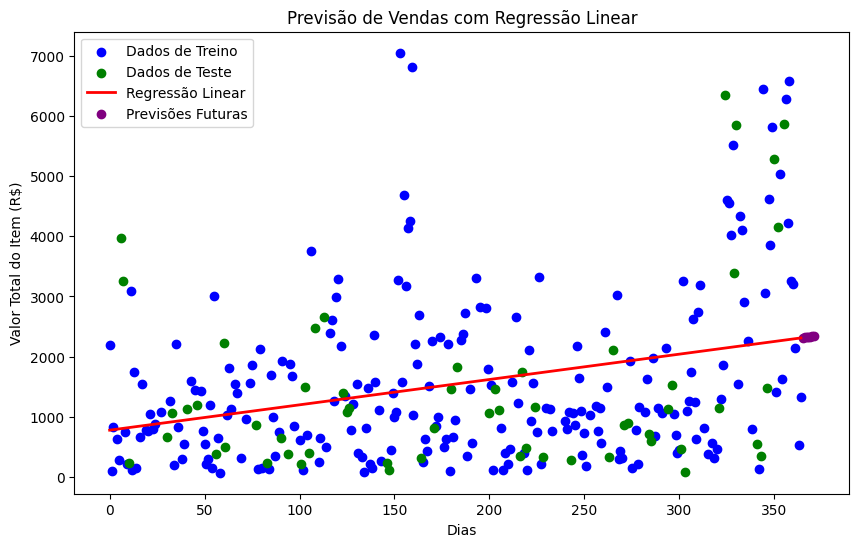

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar o dataset
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear_500_linhas_real_4.csv')

# 2. Preparar os dados
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum().reset_index()
daily_sales['Dias'] = (daily_sales['Data da Venda'] - daily_sales['Data da Venda'].min()).dt.days

# 3. Dividir os dados em treino e teste
X = daily_sales[['Dias']]
y = daily_sales['Valor Total do Item (R$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# 4. Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# 6. Avaliar o modelo
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# 7. Prever vendas para os próximos 7 dias
dias_futuros = np.array(range(daily_sales['Dias'].max() + 1, daily_sales['Dias'].max() + 8)).reshape(-1, 1)
vendas_futuras = model.predict(dias_futuros)
vendas_futuras = np.maximum(vendas_futuras, 0)

# 8. Organizar os resultados em um DataFrame
previsoes_df = pd.DataFrame({
    'Dias Futuros': dias_futuros.flatten(),
    'Previsão de Vendas (R$)': vendas_futuras
})
print(previsoes_df)

# 9. Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Dados de Treino')
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regressão Linear')
plt.scatter(dias_futuros, vendas_futuras, color='purple', label='Previsões Futuras')
plt.xlabel('Dias')
plt.ylabel('Valor Total do Item (R$)')
plt.title('Previsão de Vendas com Regressão Linear')
plt.legend()
plt.show()

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Carregar os dados
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear_500_linhas_real_4.csv')

# Converter a coluna 'Data da Venda' para datetime
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])

# Agrupar as vendas por data e calcular a soma do 'Valor Total do Item (R$)'
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum()

# Encontrar a ordem ideal do modelo ARIMA
model_auto = auto_arima(daily_sales, seasonal=True, m=12, trace=True,
                        error_action='ignore', suppress_warnings=True, 
                        stepwise=True)

# Criar o modelo ARIMA com a ordem ideal
model = ARIMA(daily_sales, order=model_auto.order)

# Ajustar o modelo
model_fit = model.fit()

# 2. Calcular o número de dias no próximo mês
ultima_data = data['Data da Venda'].max()
proximo_mes = ultima_data + MonthEnd(1)
dias_no_proximo_mes = proximo_mes.days_in_month

# 3. Fazer previsões para o próximo mês
predictions = model_fit.predict(start=len(daily_sales), end=len(daily_sales) + dias_no_proximo_mes - 1)

# 4. Criar um DataFrame com as previsões
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=dias_no_proximo_mes, freq='D')
previsoes_df = pd.DataFrame({'Data': datas_futuras, 'Previsão de Vendas (R$)': predictions})

# Exibir o DataFrame
print(previsoes_df)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4849.600, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4957.904, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4892.599, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4853.137, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4955.907, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4847.819, Time=1.20 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=4849.141, Time=2.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4847.655, Time=1.06 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4849.401, Time=2.30 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=4848.933, Time=0.92 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=4848.216, Time=1.08 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept

c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

In [8]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import MonthEnd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar o dataset
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear_500_linhas_real_4.csv')

# 2. Converter a coluna 'Data da Venda' para datetime
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])

# 3. Agrupar as vendas por data e calcular a soma do 'Valor Total do Item (R$)'
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum()

# --- ARIMA ---

# 1. Criar e ajustar o modelo ARIMA (usando ordem (5,1,0) como exemplo)
model = ARIMA(daily_sales, order=(1,1,2))
model_fit = model.fit()

# 2. Calcular o número de dias no próximo mês
ultima_data = data['Data da Venda'].max()
proximo_mes = ultima_data + MonthEnd(1)
dias_no_proximo_mes = proximo_mes.days_in_month

# 3. Fazer previsões para o próximo mês
predictions = model_fit.predict(start=len(daily_sales), end=len(daily_sales) + dias_no_proximo_mes - 1)

# 4. Criar um DataFrame com as previsões
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=dias_no_proximo_mes, freq='D')
previsoes_df = pd.DataFrame({'Data': datas_futuras, 'Previsão de Vendas (R$)': predictions})

# Exibir o DataFrame
print(previsoes_df)

# 5. Avaliar o modelo
rmse = mean_squared_error(test_data, predictions, squared=False)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape:.2f}%')

# 6. Visualizar as previsões no conjunto de teste
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Real')
plt.plot(test_data.index, predictions, label='Previsões')
plt.legend()
plt.title('Comparação entre Vendas Reais e Previsões no Conjunto de Teste')
plt.show()


          Data  Previsão de Vendas (R$)
285 2024-12-31              2059.900137
286 2025-01-01              2183.312447
287 2025-01-02              2282.258582
288 2025-01-03              2361.588900
289 2025-01-04              2425.192185
290 2025-01-05              2476.186282
291 2025-01-06              2517.070930
292 2025-01-07              2549.850301
293 2025-01-08              2576.131245
294 2025-01-09              2597.202060
295 2025-01-10              2614.095640
296 2025-01-11              2627.640111
297 2025-01-12              2638.499425
298 2025-01-13              2647.205908
299 2025-01-14              2654.186353
300 2025-01-15              2659.782942
301 2025-01-16              2664.270022
302 2025-01-17              2667.867550
303 2025-01-18              2670.751878
304 2025-01-19              2673.064394
305 2025-01-20              2674.918461
306 2025-01-21              2676.404963
307 2025-01-22              2677.596770
308 2025-01-23              2678.552304


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

NameError: name 'test_data' is not defined

In [4]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 1. Carregar o dataset
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear_500_linhas_real_4.csv')

# 2. Converter a coluna 'Data da Venda' para datetime
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])

# 3. Agrupar as vendas por data e calcular a soma do 'Valor Total do Item (R$)'
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum()

# Criar e ajustar o modelo ARIMA
model_arima = ARIMA(daily_sales, order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Criar e ajustar o modelo Prophet
model_prophet = Prophet()
model_prophet.fit(daily_sales.reset_index().rename(columns={'Data da Venda': 'ds', 'Valor Total do Item (R$)': 'y'}))

# Fazer previsões com ambos os modelos
predictions_arima = model_arima_fit.predict(start=len(daily_sales), end=len(daily_sales) + dias_no_proximo_mes - 1)
future_prophet = model_prophet.make_future_dataframe(periods=dias_no_proximo_mes)
predictions_prophet = model_prophet.predict(future_prophet)['yhat'][-dias_no_proximo_mes:]

# Calcular o RMSE para ambos os modelos
rmse_arima = mean_squared_error(daily_sales[-dias_no_proximo_mes:], predictions_arima, squared=False)
rmse_prophet = mean_squared_error(daily_sales[-dias_no_proximo_mes:], predictions_prophet, squared=False)

# Comparar os resultados
print(f'RMSE ARIMA: {rmse_arima}')
print(f'RMSE Prophet: {rmse_prophet}')

c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided

RMSE ARIMA: 1987.5368228727505
RMSE Prophet: 2069.1618908920404


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3811.563, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3830.112, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3816.086, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3819.833, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4024.315, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3809.725, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=3811.023, Time=0.13 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=3811.603, Time=0.65 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3809.574, Time=0.40 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=3811.392, Time=0.88 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=3812.483, Time=1.91 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=3811.002, Time=0.25 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=3811.041, Time=0.26 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=3811.572, Time=0.61 sec
 ARIMA(2,0,3)(1,0,0

c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Morae\AppData\Local\Temp\ipykernel_21444\3513270539.py:36: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestam

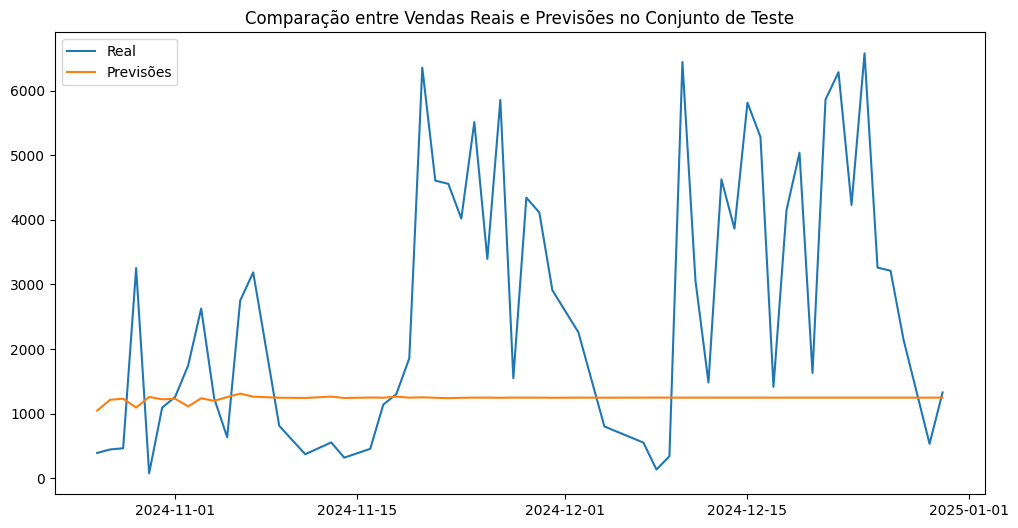

c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


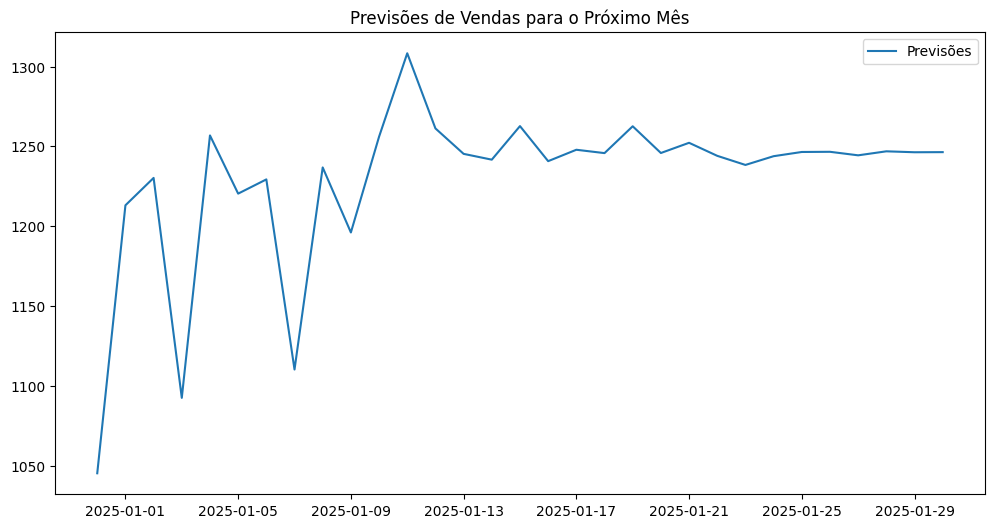

          Data  Previsão de Vendas (R$)
228 2024-12-31              1045.276325
229 2025-01-01              1213.091087
230 2025-01-02              1230.244909
231 2025-01-03              1092.507295
232 2025-01-04              1256.846449
233 2025-01-05              1220.405156
234 2025-01-06              1229.305716
235 2025-01-07              1110.259535
236 2025-01-08              1236.803394
237 2025-01-09              1196.083728
238 2025-01-10              1256.050627
239 2025-01-11              1308.295067
240 2025-01-12              1261.243177
241 2025-01-13              1245.308588
242 2025-01-14              1241.670423
243 2025-01-15              1262.689792
244 2025-01-16              1240.737806
245 2025-01-17              1247.876494
246 2025-01-18              1245.777089
247 2025-01-19              1262.578619
248 2025-01-20              1245.843666
249 2025-01-21              1252.234736
250 2025-01-22              1244.072736
251 2025-01-23              1238.366033


In [22]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar o dataset
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear_500_linhas_real_4.csv')

# 2. Converter a coluna 'Data da Venda' para datetime
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])

# 3. Agrupar as vendas por data e calcular a soma do 'Valor Total do Item (R$)'
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum()

# --- ARIMA com auto_arima e avaliação do modelo ---

# 1. Dividir os dados em treino e teste (ex: 80% treino, 20% teste)
train_data = daily_sales[:int(len(daily_sales)*0.8)]
test_data = daily_sales[int(len(daily_sales)*0.8):]

# 2. Encontrar a melhor ordem ARIMA com auto_arima (SARIMA)
model = auto_arima(train_data, seasonal=True, m=12, trace=True, 
                   error_action='ignore', suppress_warnings=True)

# 3. Ajustar o modelo ARIMA com a ordem encontrada
model_fit = model.fit(train_data)

# 4. Fazer previsões para o período de teste
predictions = model_fit.predict(n_periods=len(test_data))

# 5. Avaliar o modelo
rmse = mean_squared_error(test_data, predictions, squared=False)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape:.2f}%')

# 6. Visualizar as previsões no conjunto de teste
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Real')
plt.plot(test_data.index, predictions, label='Previsões')
plt.legend()
plt.title('Comparação entre Vendas Reais e Previsões no Conjunto de Teste')
plt.show()

# --- Previsões para o próximo mês ---

# 1. Calcular o número de dias no próximo mês
ultima_data = data['Data da Venda'].max()
proximo_mes = ultima_data + pd.tseries.offsets.MonthEnd(1)
dias_no_proximo_mes = proximo_mes.days_in_month

# 2. Fazer previsões para o próximo mês
predictions_future = model_fit.predict(n_periods=dias_no_proximo_mes)

# 3. Criar um DataFrame com as previsões
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=dias_no_proximo_mes, freq='D')
previsoes_df = pd.DataFrame({'Data': datas_futuras, 'Previsão de Vendas (R$)': predictions_future})

# 4. Visualizar as previsões para o próximo mês
plt.figure(figsize=(12,6))
plt.plot(datas_futuras, predictions_future, label='Previsões')
plt.legend()
plt.title('Previsões de Vendas para o Próximo Mês')
plt.show()

# Exibir o DataFrame
print(previsoes_df)

c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
03:04:03 - cmdstanpy - INFO - Chain [1] start processing
03:04:03 - cmdstanpy - INFO - Chain [1] done processing


|    | ds                  | yhat    | yhat_lower   | yhat_upper   |
|:---|:--------------------|:--------|:-------------|:-------------|
| 0  | 2024-12-31 00:00:00 | 3010.2  | 1259.08      | 4632.26      |
| 1  | 2025-01-01 00:00:00 | 2551.84 | 926.733      | 4151.7       |
| 2  | 2025-01-02 00:00:00 | 2589.62 | 850.138      | 4222.72      |
| 3  | 2025-01-03 00:00:00 | 2673.22 | 854.363      | 4246.96      |
| 4  | 2025-01-04 00:00:00 | 2570.3  | 933.849      | 4233.47      |
| 5  | 2025-01-05 00:00:00 | 2797.93 | 1114.7       | 4475.4       |
| 6  | 2025-01-06 00:00:00 | 2539.53 | 1043.31      | 4255.57      |
| 7  | 2025-01-07 00:00:00 | 3077.44 | 1314.13      | 4804.91      |
| 8  | 2025-01-08 00:00:00 | 2619.08 | 893.202      | 4223.02      |
| 9  | 2025-01-09 00:00:00 | 2656.86 | 922.233      | 4249.6       |
| 10 | 2025-01-10 00:00:00 | 2740.46 | 1153.3       | 4540.28      |
| 11 | 2025-01-11 00:00:00 | 2637.54 | 986.625      | 4435.22      |
| 12 | 2025-01-12 00:00:00 | 2865.

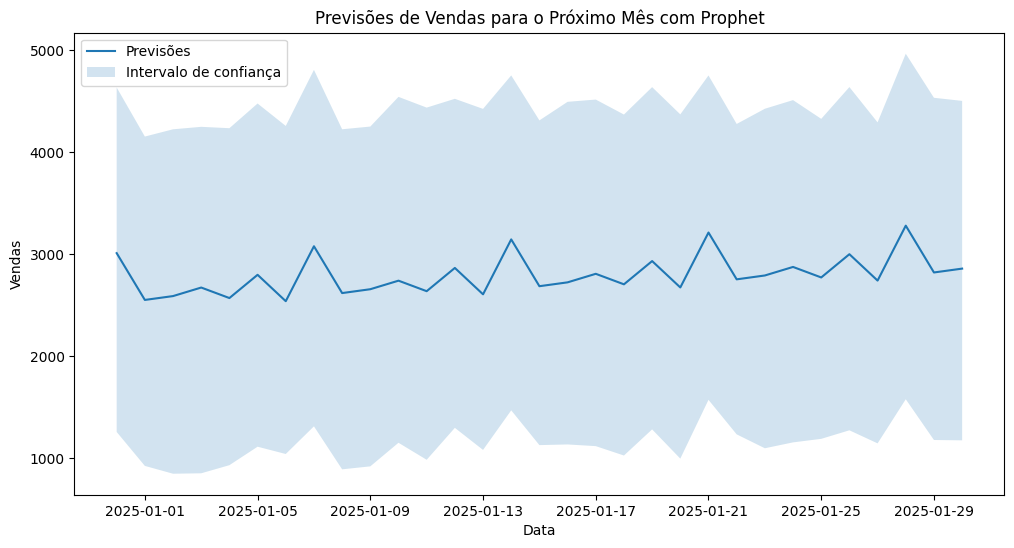

In [23]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Carregar o dataset
data = pd.read_csv(r'C:\Users\Morae\Downloads\Flaskteste\Flask\templates\RegressaoLinear_500_linhas_real_4.csv')

# 2. Converter a coluna 'Data da Venda' para datetime
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])

# 3. Agrupar as vendas por data e calcular a soma do 'Valor Total do Item (R$)'
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum()

# 4. Crie um novo DataFrame df_prophet com as colunas ds e y
df_prophet = pd.DataFrame({'ds': daily_sales.index, 'y': daily_sales.values})

# 5. Crie uma instância do modelo Prophet e ajuste-o aos dados de treinamento df_prophet
model = Prophet()
model.fit(df_prophet)

# 6. Crie um DataFrame future com as datas para as quais você deseja prever as vendas
ultima_data = data['Data da Venda'].max()
proximo_mes = ultima_data + pd.tseries.offsets.MonthEnd(1)
dias_no_proximo_mes = proximo_mes.days_in_month
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=dias_no_proximo_mes, freq='D')
future = pd.DataFrame({'ds': datas_futuras})

# 7. Faça as previsões usando a função predict() do Prophet
forecast = model.predict(future)

# 8. Imprima as previsões para o próximo mês
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_markdown(numalign="left", stralign="left"))

# 9. Gere um gráfico das previsões de vendas para o próximo mês
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(forecast['ds'], forecast['yhat'], label='Previsões')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, label='Intervalo de confiança')
ax.legend()
plt.title('Previsões de Vendas para o Próximo Mês com Prophet')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()

c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

          Data  Previsão de Vendas (R$)
285 2024-12-31              2726.003983
286 2025-01-01              3058.634843
287 2025-01-02              3137.717508
288 2025-01-03              3156.519334
289 2025-01-04              3160.989450
290 2025-01-05              3162.052216
291 2025-01-06              3162.304888
292 2025-01-07              3162.364960
293 2025-01-08              3162.379242
294 2025-01-09              3162.382638
295 2025-01-10              3162.383445
296 2025-01-11              3162.383637
297 2025-01-12              3162.383683
298 2025-01-13              3162.383694
299 2025-01-14              3162.383696
300 2025-01-15              3162.383697
301 2025-01-16              3162.383697
302 2025-01-17              3162.383697
303 2025-01-18              3162.383697
304 2025-01-19              3162.383697
305 2025-01-20              3162.383697
306 2025-01-21              3162.383697
307 2025-01-22              3162.383697
308 2025-01-23              3162.383697


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 2874.9667948637575
MAE: 2310.567448439695
MAPE: nan%


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Morae\AppData\Local\Temp\ipykernel_3032\2608145512.py:54: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp

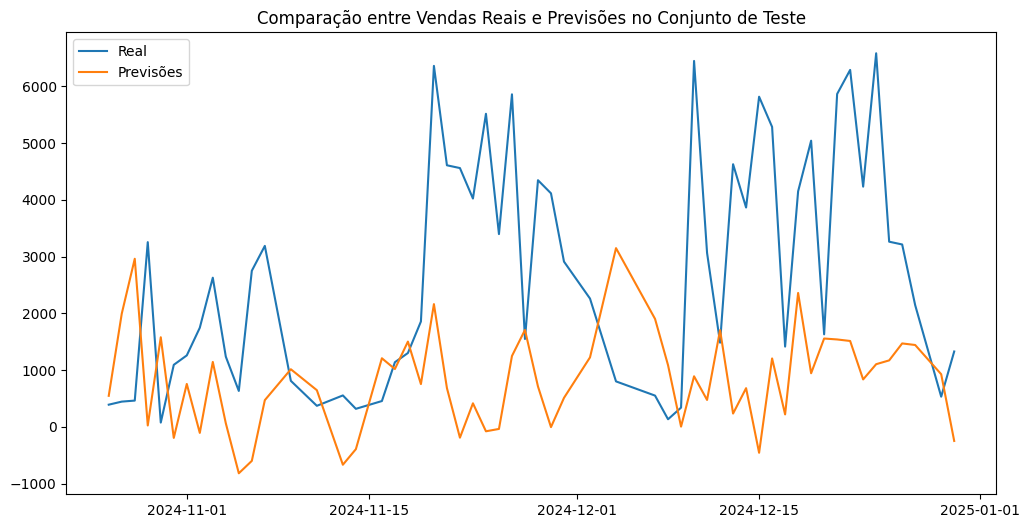

In [28]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import MonthEnd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar o dataset
data = pd.read_csv('RegressaoLinear_500_linhas_real_4.csv')

# 2. Converter a coluna 'Data da Venda' para datetime
data['Data da Venda'] = pd.to_datetime(data['Data da Venda'])

# 3. Agrupar as vendas por data e calcular a soma do 'Valor Total do Item (R$)'
daily_sales = data.groupby('Data da Venda')['Valor Total do Item (R$)'].sum()

# --- ARIMA ---

# 1. Criar e ajustar o modelo ARIMA com a ordem (1,1,1)
model = ARIMA(daily_sales, order=(1,1,1))
model_fit = model.fit()

# 2. Calcular o número de dias no próximo mês
ultima_data = data['Data da Venda'].max()
proximo_mes = ultima_data + MonthEnd(1)
dias_no_proximo_mes = proximo_mes.days_in_month

# 3. Fazer previsões para o próximo mês
predictions = model_fit.predict(start=len(daily_sales), end=len(daily_sales) + dias_no_proximo_mes - 1)

# 4. Criar um DataFrame com as previsões
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=dias_no_proximo_mes, freq='D')
previsoes_df = pd.DataFrame({'Data': datas_futuras, 'Previsão de Vendas (R$)': predictions})

# Exibir o DataFrame
print(previsoes_df)

# --- Avaliação do modelo ---

# Dividir os dados em treinamento e teste (80% para treinamento, 20% para teste)
train_data = daily_sales[:-int(len(daily_sales)*0.2)]
test_data = daily_sales[-int(len(daily_sales)*0.2):]

# Ajustar o modelo ARIMA aos dados de treinamento com a ordem (1,1,1)
model_train = ARIMA(train_data, order=(30,0,50))
model_train_fit = model_train.fit()

# Fazer previsões no conjunto de teste
predictions_test = model_train_fit.predict(start=len(train_data), end=len(daily_sales)-1)

# Calcular as métricas de erro
rmse = mean_squared_error(test_data, predictions_test, squared=False)
mae = mean_absolute_error(test_data, predictions_test)
mape = np.mean(np.abs((test_data - predictions_test) / test_data)) * 100

# Exibir as métricas de erro
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape:.2f}%')

# --- Visualização ---

# Visualizar as previsões no conjunto de teste
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Real')
plt.plot(test_data.index, predictions_test, label='Previsões')
plt.legend()
plt.title('Comparação entre Vendas Reais e Previsões no Conjunto de Teste')
plt.show()

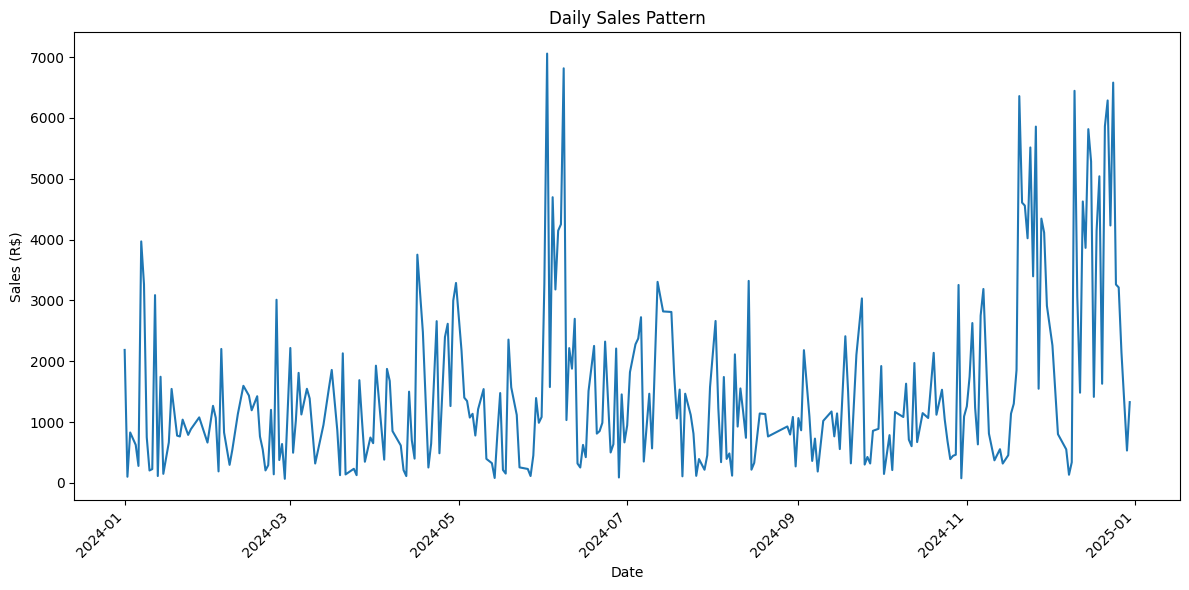

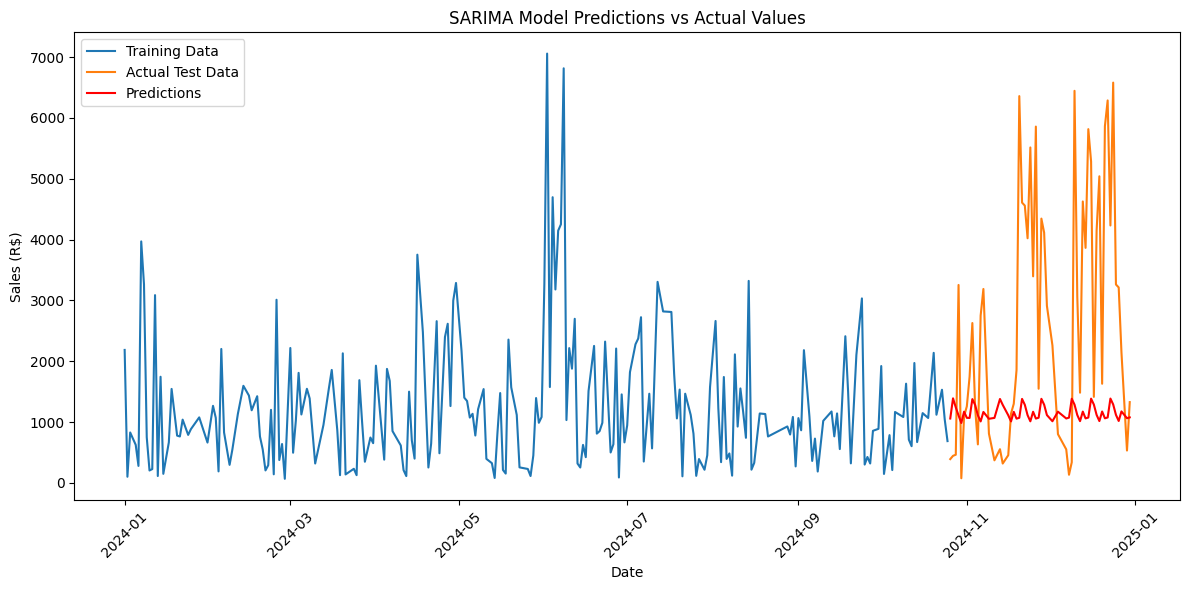

RMSE: 2515.7473332051577


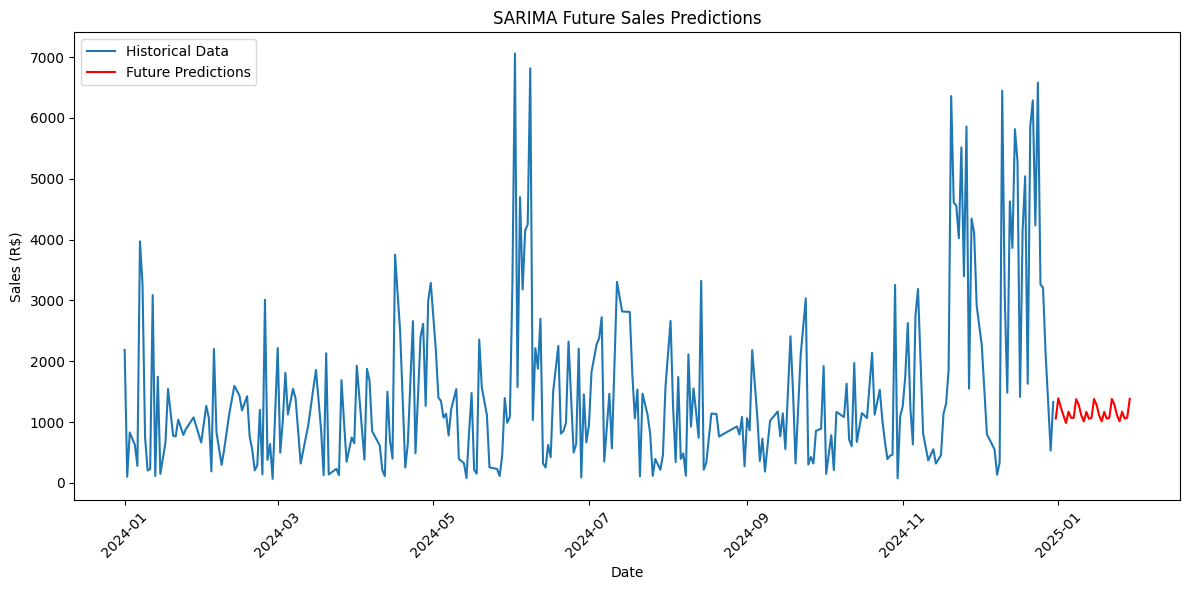

Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0100      0.081      0.123      0.902      -0.150       0.170
ma.L1         -0.7559      0.055    -13.728      0.000      -0.864      -0.648
ar.S.L7       -0.0445      0.067     -0.669      0.504      -0.175       0.086
ma.S.L7       -0.9788      0.191     -5.119      0.000      -1.354      -0.604
sigma2      1.081e+06   1.85e+05      5.854      0.000    7.19e+05    1.44e+06
First 5 future predictions:
Date: 2024-12-31, Predicted Sales: R$ 1057.20
Date: 2025-01-01, Predicted Sales: R$ 1389.23
Date: 2025-01-02, Predicted Sales: R$ 1240.56
Date: 2025-01-03, Predicted Sales: R$ 1107.64
Date: 2025-01-04, Predicted Sales: R$ 983.68
Date: 2025-01-05, Predicted Sales: R$ 1169.56
Date: 2025-01-06, Predicted Sales: R$ 1068.65
Date: 2025-01-07, Predicted Sales: R$ 1066.44
Date: 2025-01-08, Predicted Sales: R$

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Read and prepare the data
df = pd.read_csv('RegressaoLinear_500_linhas_real_4.csv')
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])
daily_sales = df.groupby('Data da Venda')['Valor Total do Item (R$)'].sum().reset_index()
daily_sales.set_index('Data da Venda', inplace=True)

# Analyze seasonal patterns
plt.figure(figsize=(12, 6))
daily_sales['Valor Total do Item (R$)'].plot()
plt.title('Daily Sales Pattern')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Split data into train and test sets
train_size = int(len(daily_sales) * 0.8)
train = daily_sales[:train_size]
test = daily_sales[train_size:]

# Fit SARIMA model
# Using order=(1,1,1) and seasonal_order=(1,1,1,7) for weekly seasonality
model = SARIMAX(train['Valor Total do Item (R$)'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Valor Total do Item (R$)'], predictions))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Valor Total do Item (R$)'], label='Training Data')
plt.plot(test.index, test['Valor Total do Item (R$)'], label='Actual Test Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('SARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('RMSE:', rmse)

# Make future predictions (next 30 days)
future_predictions = model_fit.forecast(steps=30)

# Create future dates
last_date = daily_sales.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['Valor Total do Item (R$)'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.title('SARIMA Future Sales Predictions')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('\
Model Summary:')
print(model_fit.summary().tables[1])

print('\
First 5 future predictions:')
for date, pred in zip(future_dates[:30], future_predictions[:30]):
    print(f'Date: {date.strftime("%Y-%m-%d")}, Predicted Sales: R$ {pred:.2f}')

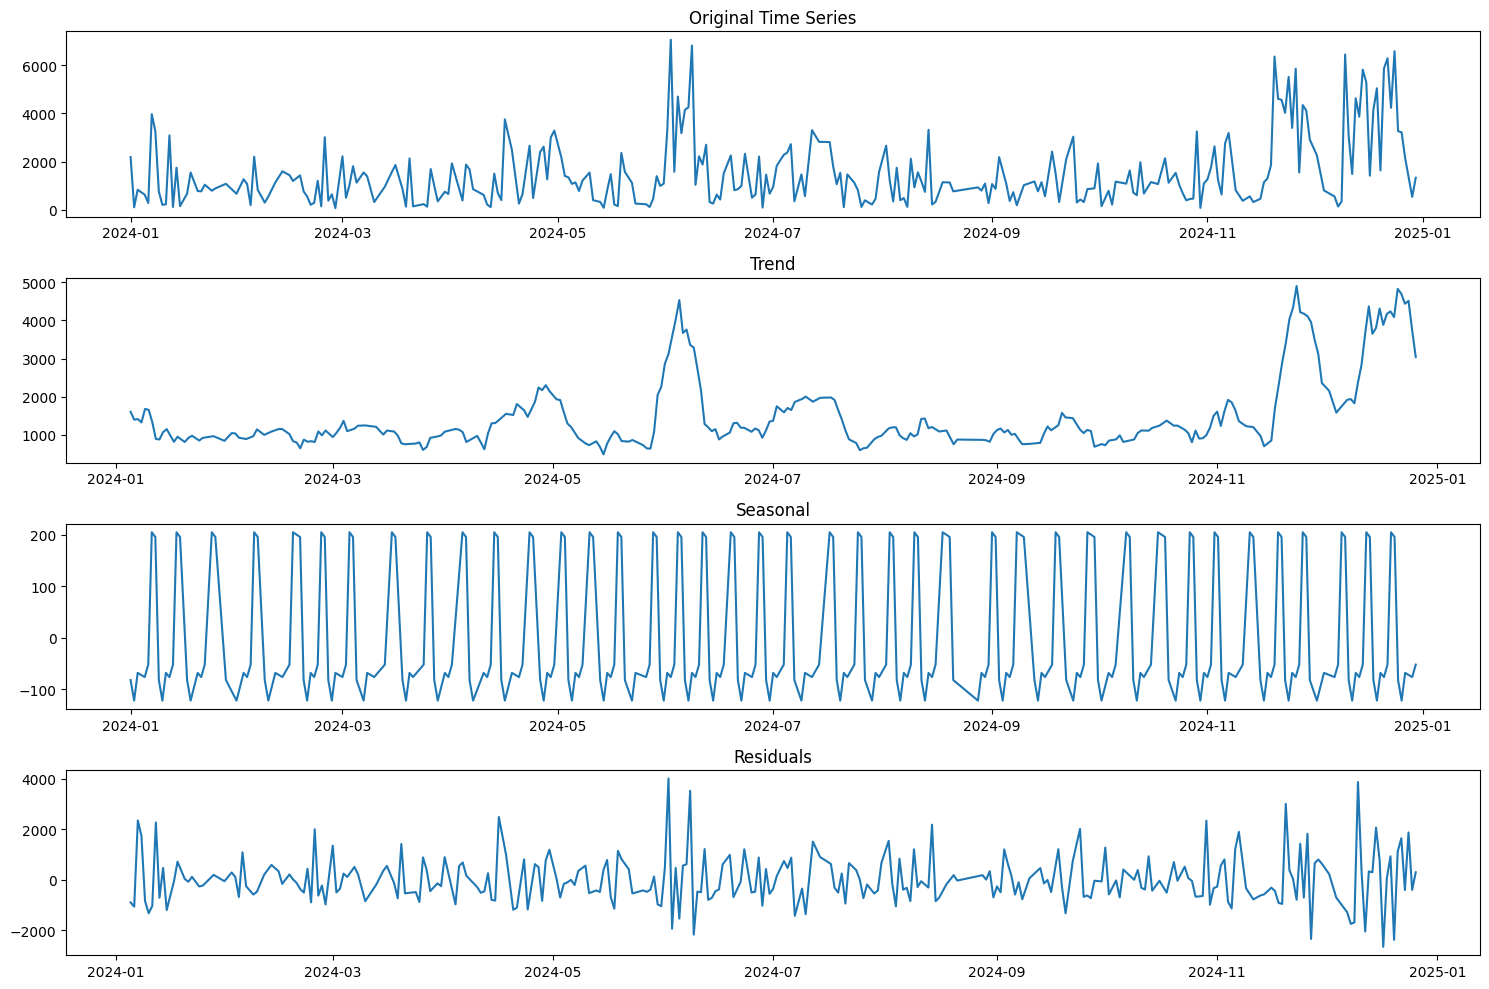

Number of outliers detected: 8
Outlier dates:
Data da Venda
2024-06-02    7056.76
2024-06-08    6814.72
2024-11-20    6357.80
2024-11-26    5856.75
2024-12-10    6444.75
Name: Valor Total do Item (R$), dtype: float64


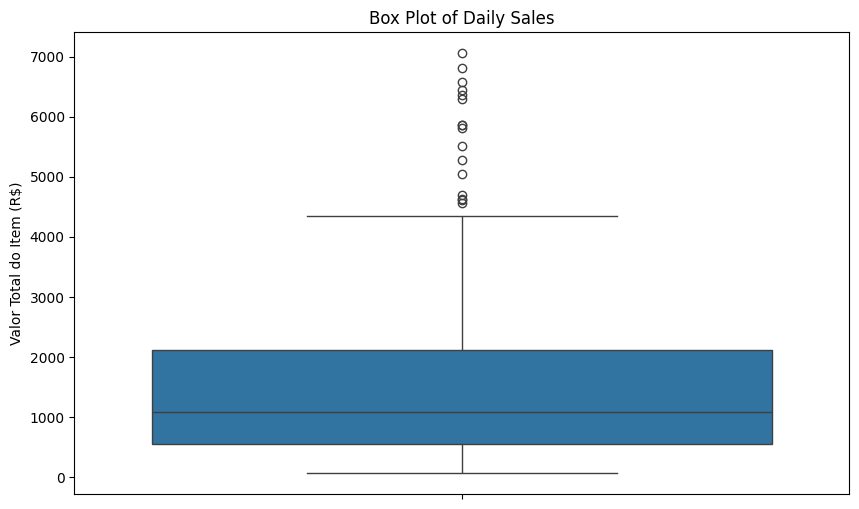

Basic statistics of daily sales:
count     285.000000
mean     1534.686982
std      1430.780618
min        65.980000
25%       544.920000
50%      1091.940000
75%      2111.930000
max      7056.760000
Name: Valor Total do Item (R$), dtype: float64


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results w

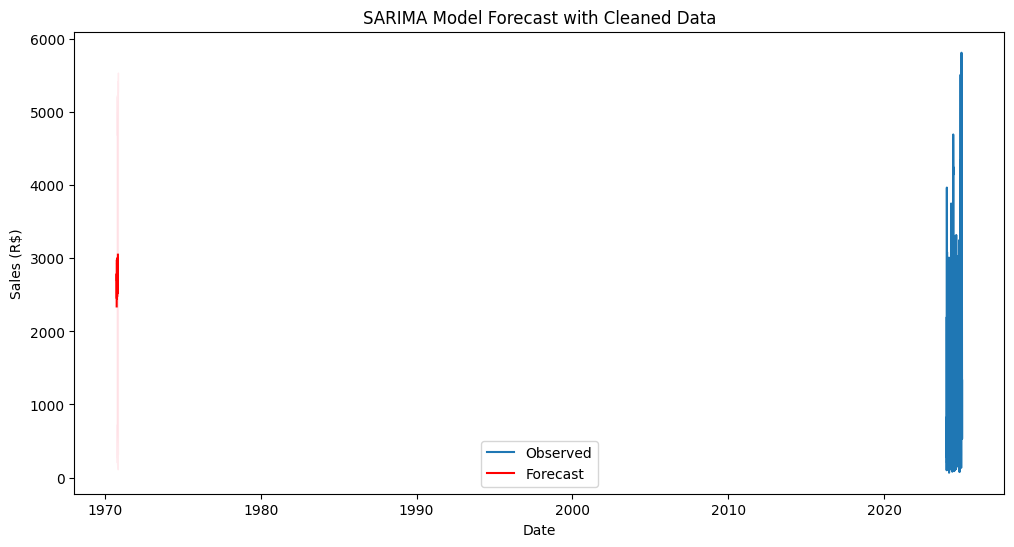

NameError: name 'mean_squared_error' is not defined

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
df = pd.read_csv('RegressaoLinear_500_linhas_real_4.csv')

# Convert date column and set as index
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])
df = df.set_index('Data da Venda')

# Create daily sales
daily_sales = df.groupby(df.index)['Valor Total do Item (R$)'].sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sales, period=7)

# Plot the decomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(daily_sales)
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()

# Detect outliers using z-score
z_scores = stats.zscore(daily_sales)
outliers = (abs(z_scores) > 3)
print("\
Number of outliers detected:", sum(outliers))
print("\
Outlier dates:")
print(daily_sales[outliers].head())

# Plot box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=daily_sales)
plt.title('Box Plot of Daily Sales')
plt.show()

# Calculate basic statistics
print("\
Basic statistics of daily sales:")
print(daily_sales.describe())
# Remove outliers from the data
cleaned_sales = daily_sales[~outliers]

# Re-evaluate the SARIMA model with cleaned data
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
sarima_model = SARIMAX(cleaned_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))

# Fit the model
sarima_results = sarima_model.fit(disp=False)

# Forecast future values
sarima_forecast = sarima_results.get_forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cleaned_sales, label='Observed')
plt.plot(sarima_forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(sarima_forecast.conf_int().index,
                 sarima_forecast.conf_int().iloc[:, 0],
                 sarima_forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Model Forecast with Cleaned Data')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.legend()
plt.show()

# Calculate RMSE for the cleaned model
rmse_cleaned = np.sqrt(mean_squared_error(cleaned_sales[-30:], sarima_forecast.predicted_mean))
print('RMSE for SARIMA model with cleaned data:', rmse_cleaned)
# Calculate RMSE for the cleaned model
from sklearn.metrics import mean_squared_error

# Forecast future values
sarima_forecast = sarima_results.get_forecast(steps=30)

# Calculate RMSE for the cleaned model
rmse_cleaned = np.sqrt(mean_squared_error(cleaned_sales[-30:], sarima_forecast.predicted_mean))
print('RMSE for SARIMA model with cleaned data:', rmse_cleaned)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cleaned_sales, label='Observed')
plt.plot(sarima_forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(sarima_forecast.conf_int().index,
                 sarima_forecast.conf_int().iloc[:, 0],
                 sarima_forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Model Forecast with Cleaned Data')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.legend()
plt.show()

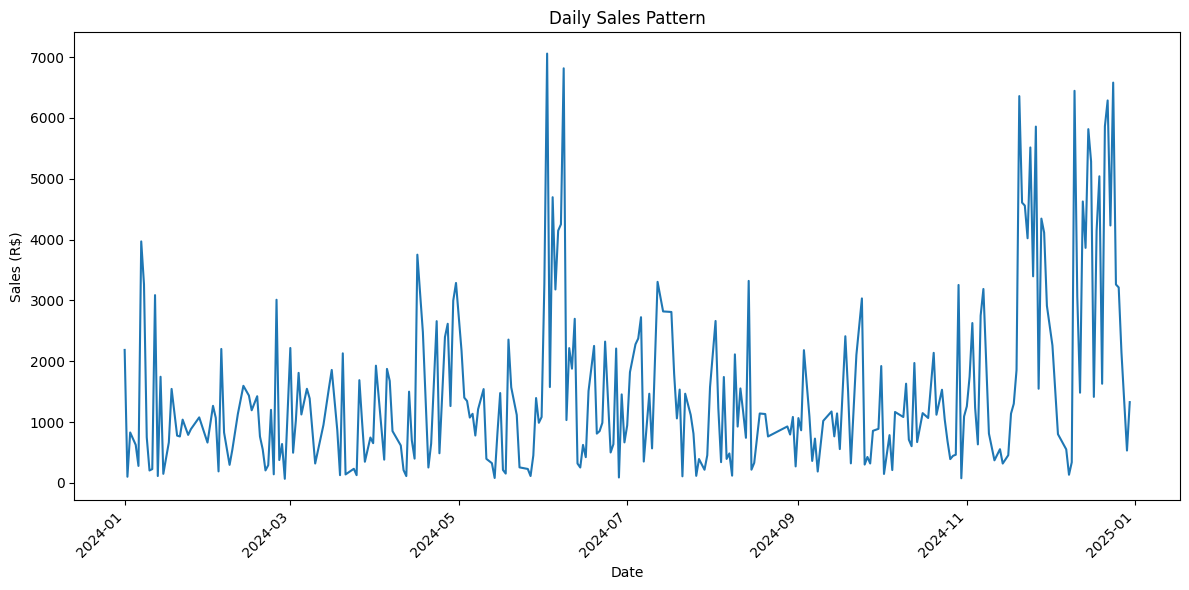

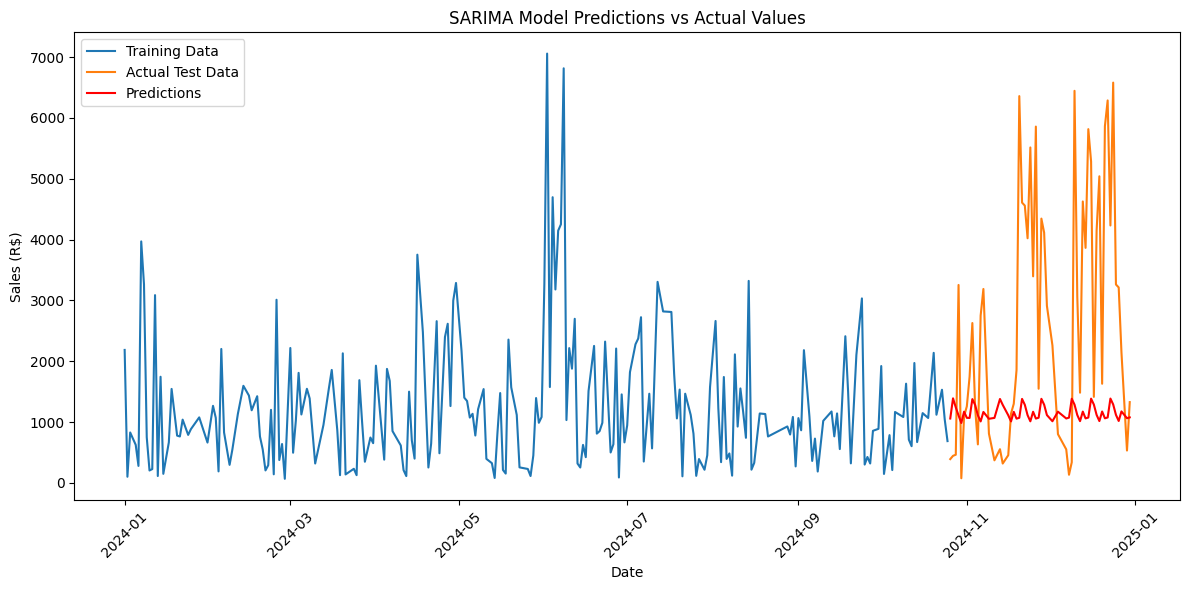

RMSE: 2515.7473332051577


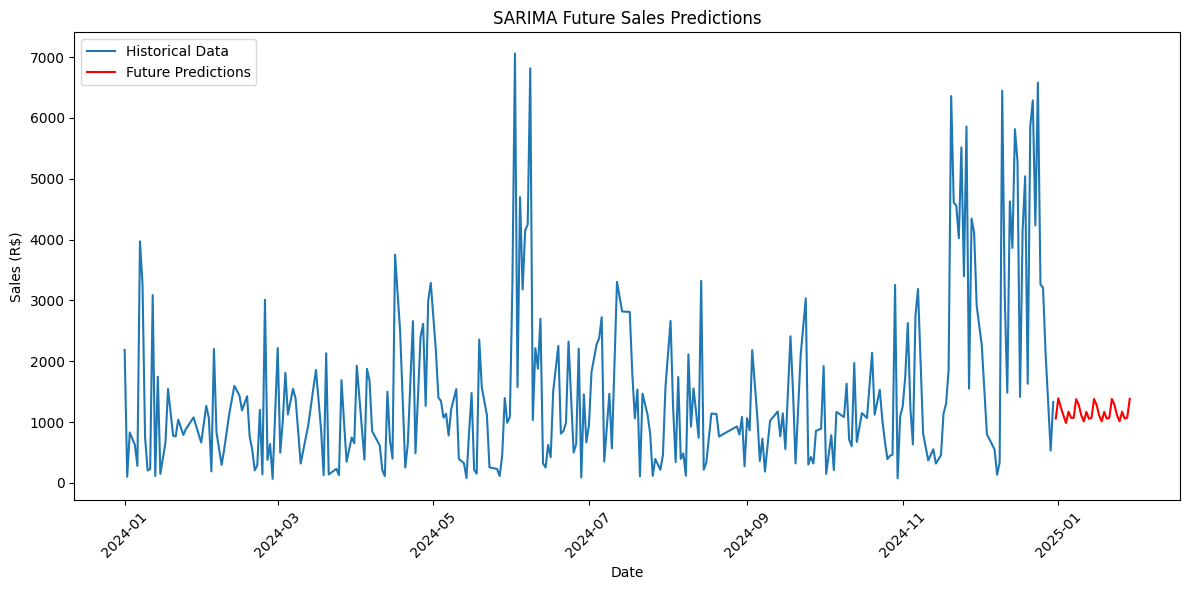

Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0100      0.081      0.123      0.902      -0.150       0.170
ma.L1         -0.7559      0.055    -13.728      0.000      -0.864      -0.648
ar.S.L7       -0.0445      0.067     -0.669      0.504      -0.175       0.086
ma.S.L7       -0.9788      0.191     -5.119      0.000      -1.354      -0.604
sigma2      1.081e+06   1.85e+05      5.854      0.000    7.19e+05    1.44e+06
First 5 future predictions:
Date: 2024-12-31, Predicted Sales: R$ 1057.20
Date: 2025-01-01, Predicted Sales: R$ 1389.23
Date: 2025-01-02, Predicted Sales: R$ 1240.56
Date: 2025-01-03, Predicted Sales: R$ 1107.64
Date: 2025-01-04, Predicted Sales: R$ 983.68
Date: 2025-01-05, Predicted Sales: R$ 1169.56
Date: 2025-01-06, Predicted Sales: R$ 1068.65
Date: 2025-01-07, Predicted Sales: R$ 1066.44
Date: 2025-01-08, Predicted Sales: R$

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Read and prepare the data
df = pd.read_csv('RegressaoLinear_500_linhas_real_4.csv')
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])
daily_sales = df.groupby('Data da Venda')['Valor Total do Item (R$)'].sum().reset_index()
daily_sales.set_index('Data da Venda', inplace=True)

# Analyze seasonal patterns
plt.figure(figsize=(12, 6))
daily_sales['Valor Total do Item (R$)'].plot()
plt.title('Daily Sales Pattern')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Split data into train and test sets
train_size = int(len(daily_sales) * 0.8)
train = daily_sales[:train_size]
test = daily_sales[train_size:]

# Fit SARIMA model
# Using order=(1,1,1) and seasonal_order=(1,1,1,7) for weekly seasonality
model = SARIMAX(train['Valor Total do Item (R$)'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Valor Total do Item (R$)'], predictions))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Valor Total do Item (R$)'], label='Training Data')
plt.plot(test.index, test['Valor Total do Item (R$)'], label='Actual Test Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('SARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('RMSE:', rmse)

# Make future predictions (next 30 days)
future_predictions = model_fit.forecast(steps=30)

# Create future dates
last_date = daily_sales.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['Valor Total do Item (R$)'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.title('SARIMA Future Sales Predictions')
plt.xlabel('Date')
plt.ylabel('Sales (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('\
Model Summary:')
print(model_fit.summary().tables[1])

print('\
First 5 future predictions:')
for date, pred in zip(future_dates[:30], future_predictions[:30]):
    print(f'Date: {date.strftime("%Y-%m-%d")}, Predicted Sales: R$ {pred:.2f}')